In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
data.shape

(41266, 502)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


## Excersise 1:

### Which are stocks are apparently similar in nature

In [5]:
df = data.drop(['DATE', 'SP500'], axis=1)

In [6]:
cor = df.corr()

In [7]:
corr = pd.DataFrame(cor, columns=cor.index, index = cor.index)

In [8]:
corr.stack().drop_duplicates().sort_values(ascending=False)[ :20]

NASDAQ.AAL    NASDAQ.AAL      1.000000
NASDAQ.GOOG   NASDAQ.GOOGL    0.998352
NASDAQ.DISCA  NASDAQ.DISCK    0.996855
NASDAQ.NWS    NASDAQ.NWSA     0.996612
NASDAQ.FOX    NASDAQ.FOXA     0.996182
NYSE.DD       NYSE.DOW        0.986025
NYSE.UA       NYSE.UAA        0.983613
NYSE.DVN      NYSE.MRO        0.983269
NYSE.CMS      NYSE.ES         0.981819
              NYSE.DTE        0.981701
NYSE.LMT      NYSE.RTN        0.981134
NYSE.MA       NYSE.V          0.980574
NYSE.DVN      NYSE.RIG        0.980150
NASDAQ.ADBE   NYSE.MA         0.979629
NASDAQ.ETFC   NYSE.BK         0.978342
NYSE.DTE      NYSE.ES         0.978332
NASDAQ.NVDA   NYSE.AON        0.977920
NYSE.MCD      NYSE.YUM        0.977900
NYSE.AEP      NYSE.DTE        0.977853
NASDAQ.PYPL   NYSE.MA         0.977071
dtype: float64

In [9]:
# These are the top 20 stocks which are similiar in performance

## Excersise 2:

### How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [10]:
from math import sqrt
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans

In [11]:
returns = df.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = df.pct_change().std()*sqrt(252)
returns.head()

,Returns,Volatility
NASDAQ.AAL,0.000441,0.014326
NASDAQ.AAPL,0.000855,0.009879
NASDAQ.ADBE,0.001144,0.009637
NASDAQ.ADI,0.000198,0.012395
NASDAQ.ADP,0.000310,0.011048


In [12]:
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T
dta.shape

(500, 2)

In [13]:
X = dta
distortions =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

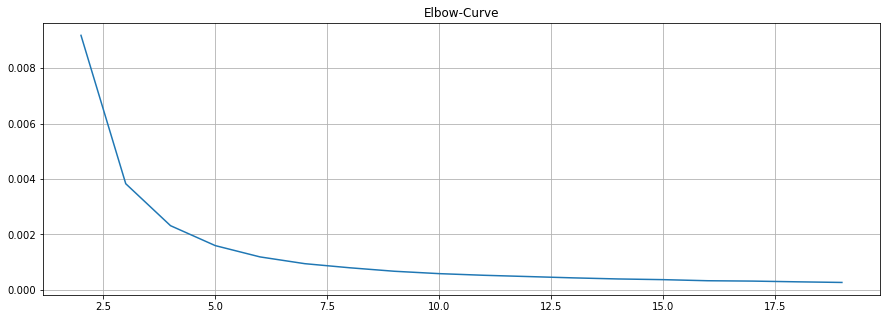

In [14]:
fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20),distortions)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

In [15]:
# Steepness is achieved at 4 or 5 clusters so we will use 5 

In [16]:
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

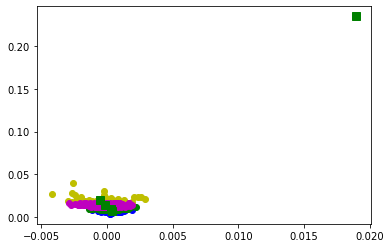

In [17]:
from pylab import plot, show
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

So it looks like we have an outlier 

In [18]:
#identify the outlier
print(returns.idxmax())

Returns       NYSE.XRX
Volatility    NYSE.XRX
dtype: object


In [19]:
returns.drop(['NYSE.XRX'],inplace=True)

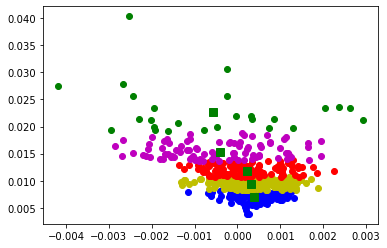

In [20]:
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [21]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]

[('NASDAQ.AAL', 4),
 ('NASDAQ.AAPL', 1),
 ('NASDAQ.ADBE', 1),
 ('NASDAQ.ADI', 2),
 ('NASDAQ.ADP', 2)]

In [22]:
df1 = pd.DataFrame(details, columns=['Stock_Name','Cluster_No'])
df1.Cluster_No.value_counts()

1    163
2    119
0    104
4     87
3     26
Name: Cluster_No, dtype: int64

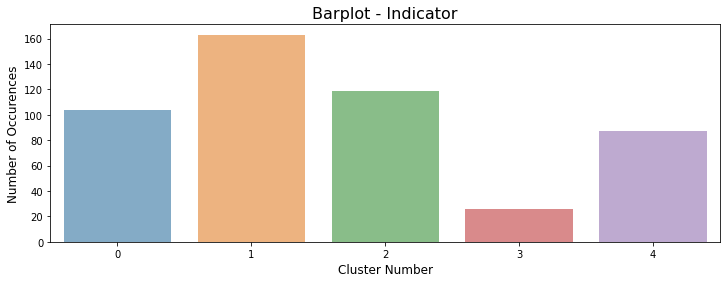

In [23]:
import seaborn as sns
ind = df1.Cluster_No.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ind.index, y=ind.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()

## Excercise 3 PCA:

### Identify which all stocks are moving together and which all stocks are different from each other

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.values

sc = StandardScaler().fit_transform(X)
pca = PCA(n_components=150).fit(sc)

var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4))
print(var1)

[0.4703 0.6426 0.7628 0.8113 0.8493 0.8774 0.8974 0.9105 0.921  0.9285
 0.9353 0.9411 0.9457 0.9502 0.9543 0.9578 0.9611 0.9637 0.966  0.9682
 0.9701 0.9717 0.9732 0.9745 0.9758 0.977  0.9781 0.9791 0.98   0.9808
 0.9816 0.9824 0.9831 0.9838 0.9844 0.985  0.9856 0.9861 0.9866 0.9871
 0.9875 0.9879 0.9883 0.9887 0.9891 0.9894 0.9897 0.99   0.9903 0.9906
 0.9909 0.9912 0.9915 0.9917 0.9919 0.9921 0.9923 0.9925 0.9927 0.9929
 0.9931 0.9933 0.9935 0.9937 0.9939 0.9941 0.9943 0.9945 0.9946 0.9947
 0.9948 0.9949 0.995  0.9951 0.9952 0.9953 0.9954 0.9955 0.9956 0.9957
 0.9958 0.9959 0.996  0.9961 0.9962 0.9963 0.9964 0.9965 0.9966 0.9967
 0.9968 0.9969 0.997  0.9971 0.9972 0.9973 0.9974 0.9975 0.9976 0.9977
 0.9978 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979
 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979
 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979
 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979 0.9979
 0.997

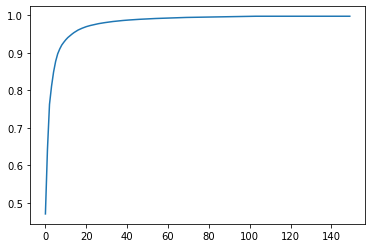

In [26]:
plt.plot(var1)

In [27]:
X_scaled = PCA(n_components=25).fit(sc)

In [29]:
comp = pd.DataFrame(pca.components_, columns = df.columns)
comp.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039258,-0.041064,-0.062908,-0.009788,-0.035866,-0.054668,0.050356,-0.035396,-0.044060,-0.014671,...,-0.049413,0.057001,-0.054623,-0.050608,0.047199,-0.057897,-0.061392,-0.062477,0.002538,-0.051698
1,-0.064284,0.033861,0.001861,-0.032453,0.043511,-0.029519,0.016178,0.058286,-0.052667,0.012376,...,-0.058941,0.030277,0.013643,-0.040769,-0.052795,0.010238,0.031466,-0.020406,-0.081229,-0.059501
2,-0.039858,0.064165,0.012079,0.043266,-0.037239,0.040506,-0.053892,-0.051099,0.030738,-0.086428,...,-0.003223,0.022125,0.059617,-0.034587,-0.028712,-0.039074,-0.004342,0.021010,-0.066373,0.023570
3,0.007578,0.077164,0.008564,-0.027896,-0.017418,0.008973,-0.032239,0.034448,0.051511,-0.077594,...,0.021692,0.060885,-0.039630,0.027694,0.012100,-0.039575,0.002900,-0.002703,-0.049420,0.015160
4,-0.033303,-0.016981,0.002438,-0.038330,-0.102023,-0.034831,-0.011187,0.037595,-0.039683,-0.014357,...,-0.036672,-0.011451,-0.030314,-0.012030,-0.045731,0.029255,-0.003013,-0.001339,-0.003603,0.005364
